<a href="https://colab.research.google.com/github/ShahrukhGouhar/praxisClass/blob/main/PyTorch0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1st Coding Session

In [ ]:
# import os
# assert os.environ['COLAB_TPU_ADDR'], 'Make sure to select TPU from Edit > Notebook settings > Hardware accelerator'

In [ ]:
# !pip install cloud-tpu-client==0.10 https://storage.googleapis.com/tpu-pytorch/wheels/torch_xla-1.9-cp37-cp37m-linux_x86_64.whl

In [ ]:
# imports pytorch
import torch

# imports the torch_xla package
# import torch_xla
# import torch_xla.core.xla_model as xm

In [ ]:
import numpy as np

In [ ]:
x = np.linspace(0,2*np.pi,num=2000)
x[:20]

array([0.        , 0.00314316, 0.00628633, 0.00942949, 0.01257266,
       0.01571582, 0.01885899, 0.02200215, 0.02514531, 0.02828848,
       0.03143164, 0.03457481, 0.03771797, 0.04086114, 0.0440043 ,
       0.04714746, 0.05029063, 0.05343379, 0.05657696, 0.05972012])

In [ ]:
y = np.sin(x)
y[:20]

array([0.        , 0.00314316, 0.00628629, 0.00942935, 0.01257233,
       0.01571517, 0.01885787, 0.02200037, 0.02514266, 0.02828471,
       0.03142647, 0.03456792, 0.03770903, 0.04084977, 0.0439901 ,
       0.04713   , 0.05026943, 0.05340837, 0.05654678, 0.05968463])

In [ ]:
# y = a + b*x + c*x**3

In [ ]:
dtype = torch.float
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cuda')


In [ ]:
a = torch.randn((),dtype=dtype,device=device,requires_grad=True)  # we are not providing size
b = torch.randn((),dtype=dtype,device=device,requires_grad=True)  # we are not providing size
c = torch.randn((),dtype=dtype,device=device,requires_grad=True)  # we are not providing size
d = torch.randn((),dtype=dtype,device=device,requires_grad=True)  # we are not providing size

a,b,c,d

(tensor(-0.1846, requires_grad=True),
 tensor(0.4984, requires_grad=True),
 tensor(-0.2751, requires_grad=True),
 tensor(0.5983, requires_grad=True))

(tensor([0.], dtype=torch.float64), tensor([0.], dtype=torch.float64))

In [ ]:
y_cap = a + b*x_tensor[0] + c*x_tensor[0]**2 + d*x_tensor[0]**3
y_cap

tensor(-0.1846, dtype=torch.float64, grad_fn=<AddBackward0>)

In [ ]:
y_pred = a + b*x_tensor + c*x_tensor**2 + d*x_tensor**3
y_pred[:10]

tensor([-0.1846, -0.1831, -0.1815, -0.1799, -0.1784, -0.1769, -0.1753, -0.1738,
        -0.1723, -0.1707], dtype=torch.float64, grad_fn=<SliceBackward>)

In [ ]:
loss = ((y_tensor - y_pred)**2).sum()
loss

tensor(5666554.2300, dtype=torch.float64, grad_fn=<SumBackward0>)

In [ ]:
loss.backward()

In [ ]:
with torch.no_grad():
    a -= lr*a.grad
    b -= lr*b.grad
    c -= lr*c.grad
    d -= lr*d.grad

In [ ]:
a,b,c,d

(tensor(-139.6987, requires_grad=True),
 tensor(-705.6450, requires_grad=True),
 tensor(-3705.7271, requires_grad=True),
 tensor(-19972.4375, requires_grad=True))

In [ ]:
a.grad = None
b.grad = None
c.grad = None
d.grad = None

In [ ]:
a,b,c,d

(tensor(128.2309, requires_grad=True),
 tensor(613.5635, requires_grad=True),
 tensor(3119.7458, requires_grad=True),
 tensor(16512.1602, requires_grad=True))

In [ ]:
# Initialization
a = torch.randn((),dtype=dtype,device=device,requires_grad=True)  # we are not providing size
b = torch.randn((),dtype=dtype,device=device,requires_grad=True)  
c = torch.randn((),dtype=dtype,device=device,requires_grad=True)  
d = torch.randn((),dtype=dtype,device=device,requires_grad=True)  
loss_list = []

In [ ]:
lr = 0.00000001
for it in range(0,20000*8):
    y_pred = a + b*x_tensor + c*x_tensor**2 + d*x_tensor**3
    loss = ((y_tensor - y_pred)**2).sum()
    loss.backward()

    with torch.no_grad():
        a -= lr*a.grad
        b -= lr*b.grad
        c -= lr*c.grad
        d -= lr*d.grad

        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

    loss_list.append(loss.item())

# print()

In [ ]:
loss_list[-10:]

[13.08071381734387,
 13.08064519543154,
 13.08057657435511,
 13.080507954114598,
 13.080439334709991,
 13.080370716141285,
 13.080302063050404,
 13.080233445973512,
 13.080164829732524,
 13.080096214327448]

In [ ]:
a,b,c,d

(tensor(-0.1520, requires_grad=True),
 tensor(1.7245, requires_grad=True),
 tensor(-0.8012, requires_grad=True),
 tensor(0.0849, requires_grad=True))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.plot(loss_list)

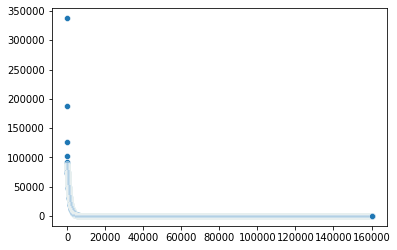

In [ ]:
sns.scatterplot(x=list(range(0,20000*8)),y=loss_list)

In [ ]:
y_pred_final = a + b*x_tensor + c*x_tensor**2 + d*x_tensor**3

In [ ]:
y_pred_final[:10]

tensor([-0.1520, -0.1466, -0.1412, -0.1358, -0.1304, -0.1251, -0.1198, -0.1144,
        -0.1091, -0.1038], dtype=torch.float64, grad_fn=<SliceBackward>)

In [ ]:
Y_cap = y_pred_final.detach().cpu().numpy()

In [ ]:
Y_cap[:10]

array([-0.15199335, -0.14658093, -0.14118433, -0.13580353, -0.13043852,
       -0.12508927, -0.11975577, -0.11443801, -0.10913597, -0.10384963])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


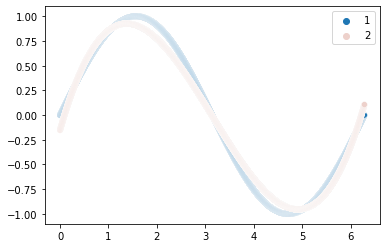

In [ ]:
sns.scatterplot(x,y,hue=np.repeat(1,len(y)))
sns.scatterplot(x,Y_cap, hue=np.repeat(2,len(y)))
plt.show()

# USING DL

In [ ]:
from torch.optim import Adam, RMSprop

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


In [ ]:
class MLP1(nn.Module):

    def __init__(self):
        super(MLP1, self).__init__()
        self.h1 = nn.Linear(in_features=1,out_features=3)
        self.out = nn.Linear(in_features=3, out_features=1)

    def forward(self, x):
        x = torch.sigmoid(self.h1(x))
        x = self.out(x)

        return x
    

net = MLP1()

In [ ]:
loss_list = []

In [ ]:
# lr = 1e-6
net = net.to(device)
optim = RMSprop(params=net.parameters(),lr=0.001)

x_tensor = x_tensor.reshape(-1,1)
y_tensor = y_tensor.reshape(-1,1)

for it in range(20000):
    output = net(x_tensor.to(device).float())
    loss = F.mse_loss(output,y_tensor.to(device).float())

    loss.backward()

    optim.step()
    optim.zero_grad()

    loss_list.append(loss.item())
    


In [ ]:
loss_list[-10:]

[0.4827229678630829,
 0.4802865982055664,
 0.47795504331588745,
 0.47571632266044617,
 0.4735604226589203,
 0.4714791774749756,
 0.46946561336517334,
 0.4675137996673584,
 0.4656185507774353,
 0.4637755751609802]

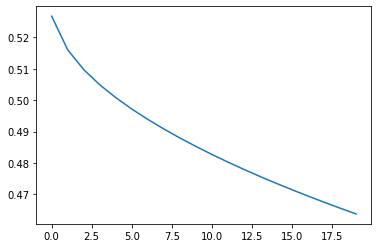

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(loss_list)
plt.show()

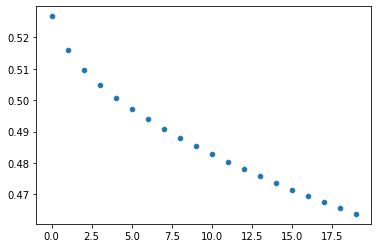

In [ ]:
sns.scatterplot(x=list(range(len(loss_list))),y=loss_list)
plt.show()

In [ ]:
y_cap = net(x_tensor.to(device).float()).detach().cpu().numpy()
y_cap.shape

(2000, 1)

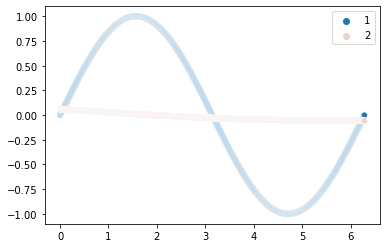

In [ ]:
sns.scatterplot(x=x,y=y,hue=np.repeat(1,len(y)))
sns.scatterplot(x=x,y=y_cap.flatten(), hue=np.repeat(2,len(y)))
plt.show()

In [ ]:
for i in net.parameters():
    print(i)
    print('\n\n')

Parameter containing:
tensor([[ 0.1782],
        [ 0.1627],
        [-0.6662]], requires_grad=True)



Parameter containing:
tensor([-0.7320,  0.0416,  0.8608], requires_grad=True)



Parameter containing:
tensor([[ 0.4880, -0.5660,  0.1755]], requires_grad=True)



Parameter containing:
tensor([0.0663], requires_grad=True)





# AutoMPG Regression


In [ ]:
!wget down 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
!wget down 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names'

--2021-09-02 05:56:24--  http://down/
Resolving down (down)... failed: Name or service not known.
wget: unable to resolve host address ‘down’
--2021-09-02 05:56:24--  https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30286 (30K) [application/x-httpd-php]
Saving to: ‘auto-mpg.data.1’

auto-mpg.data.1     100%[===================>]  29.58K  --.-KB/s    in 0.07s   

2021-09-02 05:56:24 (442 KB/s) - ‘auto-mpg.data.1’ saved [30286/30286]

FINISHED --2021-09-02 05:56:24--
Total wall clock time: 0.5s
Downloaded: 1 files, 30K in 0.07s (442 KB/s)
--2021-09-02 05:56:25--  http://down/
Resolving down (down)... failed: Name or service not known.
wget: unable to resolve host address ‘down’
--2021-09-02 05:56:25--  https://archive.ics.uci.edu/ml/machine-lear

In [ ]:
import pandas as pd

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
with open("/content/auto-mpg.names") as f:
    print(f.read())

1. Title: Auto-Mpg Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University. The dataset was 
                used in the 1983 American Statistical Association Exposition.
   (c) Date: July 7, 1993

3. Past Usage:
    -  See 2b (above)
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   This dataset is a slightly modified version of the dataset provided in
   the StatLib library.  In line with the use by Ross Quinlan (1993) in
   predicting the attribute "mpg", 8 of the original instances were removed 
   because they had unknown values for the "mpg" attribute.  The original 
   dataset is available in the file "auto-mpg.data-original".

   "The data concerns city-cycle fuel consumptio

In [ ]:
columns = ['mpg','cylinders','disp','hp','weight','acc','model year','origin','carname']

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',sep='\s+',names=columns,header=None)
df.shape

(398, 9)

In [ ]:
df.head(2)

,mpg,cylinders,disp,hp,weight,acc,model year,origin,carname
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         398 non-null    float64
 1   cylinders   398 non-null    int64  
 2   disp        398 non-null    float64
 3   hp          398 non-null    object 
 4   weight      398 non-null    float64
 5   acc         398 non-null    float64
 6   model year  398 non-null    int64  
 7   origin      398 non-null    int64  
 8   carname     398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df.replace(['?','_','-',' ','.'],np.nan, inplace=True)

In [ ]:
df.isnull().sum()/df.shape[0]

mpg           0.000000
cylinders     0.000000
disp          0.000000
hp            0.015075
weight        0.000000
acc           0.000000
model year    0.000000
origin        0.000000
carname       0.000000
dtype: float64

In [ ]:
df.drop(columns=['carname','model year','origin'],inplace=True)

In [ ]:
df.dropna(how='any',inplace=True)

In [ ]:
df = df.astype(np.float64)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mpg        392 non-null    float64
 1   cylinders  392 non-null    float64
 2   disp       392 non-null    float64
 3   hp         392 non-null    float64
 4   weight     392 non-null    float64
 5   acc        392 non-null    float64
dtypes: float64(6)
memory usage: 21.4 KB


In [ ]:
X = np.array(df.iloc[:,1:6])
X

array([[   8. ,  307. ,  130. , 3504. ,   12. ],
       [   8. ,  350. ,  165. , 3693. ,   11.5],
       [   8. ,  318. ,  150. , 3436. ,   11. ],
       ...,
       [   4. ,  135. ,   84. , 2295. ,   11.6],
       [   4. ,  120. ,   79. , 2625. ,   18.6],
       [   4. ,  119. ,   82. , 2720. ,   19.4]])

In [ ]:
X.dtype

dtype('float64')

In [ ]:
X = torch.from_numpy(X)

In [ ]:
y = df.iloc[:,[0]]
# print(len(y.iloc[:,0].unique()))
y.shape

(392, 1)

In [ ]:
# classes = pd.get_dummies(y)

In [ ]:
# lb = MultiLabelBinarizer()
# Y = lb.fit_transform(classes)

# Y

In [ ]:
X.shape

torch.Size([392, 5])

In [ ]:
class MLP1(nn.Module):

    def __init__(self):
        super(MLP1, self).__init__()
        self.h1 = nn.Linear(in_features=5,out_features=8)
        self.out = nn.Linear(in_features=8, out_features=1)

    def forward(self, x):
        x = torch.relu(self.h1(x))
        x = self.out(x)

        return x
    


In [ ]:
# Y = np.array(y)
# Y = torch.from_numpy(Y)
# Y.flatten().reshape(-1,1)

In [ ]:
net = MLP1()

Y = np.array(y)
Y = torch.from_numpy(Y)
Y.flatten().reshape(-1,1)


# lr = 1e-6
loss_list = []

net = net.to(device)

optim = RMSprop(params=net.parameters(),lr=0.0001)



for it in range(20000):
    output = net(X.to(device).float())
    loss = F.mse_loss(output,Y.to(device).float())

    loss.backward()

    optim.step()
    optim.zero_grad()

    loss_list.append(loss.item())
    



In [ ]:
y_cap = net(X.to(device).float()).detach().cpu().numpy()
y_cap.shape, len(Y.unique())

((392, 1), 127)

In [ ]:
len(set(y_cap.flatten()))

390

In [ ]:
loss_list[0:10],loss_list[-10:]

([1711.862548828125,
  1130.7913818359375,
  833.5479736328125,
  644.433349609375,
  513.3506469726562,
  418.2708740234375,
  347.37738037109375,
  293.5577087402344,
  252.1922607421875,
  220.1206512451172],
 [29.904958724975586,
  29.904815673828125,
  29.904775619506836,
  29.904624938964844,
  29.904605865478516,
  29.904460906982422,
  29.90441131591797,
  29.904272079467773,
  29.904237747192383,
  29.904094696044922])

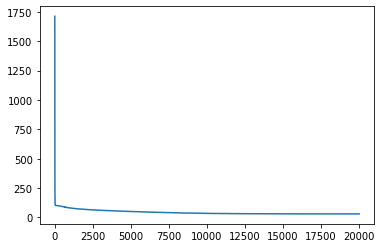

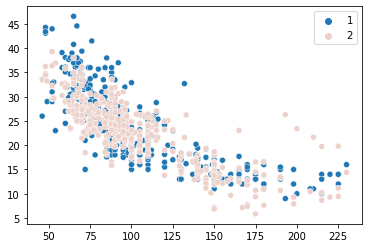

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(loss_list)
plt.show()


X_ = np.array(df['hp'])
sns.scatterplot(x=X_,y=Y.flatten(),hue=np.repeat(1,len(Y)))
sns.scatterplot(x=X_,y=y_cap.flatten(), hue=np.repeat(2,len(Y)))
plt.show()

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'disp', 'hp', 'weight', 'acc'], dtype='object')

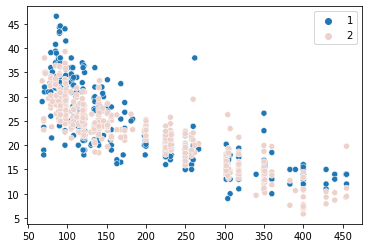

In [ ]:
X_ = np.array(df['disp'])
sns.scatterplot(x=X_,y=Y.flatten(),hue=np.repeat(1,len(Y)))
sns.scatterplot(x=X_,y=y_cap.flatten(), hue=np.repeat(2,len(Y)))
plt.show()

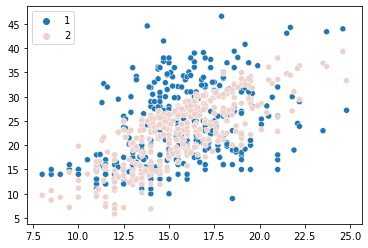

In [ ]:
X_ = np.array(df['acc'])
sns.scatterplot(x=X_,y=Y.flatten(),hue=np.repeat(1,len(Y)))
sns.scatterplot(x=X_,y=y_cap.flatten(), hue=np.repeat(2,len(Y)))
plt.show()

# Non Linear Classification using NLP

Do this by following lecture

In [ ]:
from sklearn.datasets import make_circles

In [ ]:
import torch
import torch.nn as nn


# DNN | SEP 14 2021

In [ ]:
!wget https://raw.githubusercontent.com/MorvanZhou/PyTorch-Tutorial/master/tutorial-contents-notebooks/mnist/processed/training.pt
!wget https://raw.githubusercontent.com/MorvanZhou/PyTorch-Tutorial/master/tutorial-contents-notebooks/mnist/processed/test.pt

--2021-10-02 15:03:49--  https://raw.githubusercontent.com/MorvanZhou/PyTorch-Tutorial/master/tutorial-contents-notebooks/mnist/processed/training.pt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47520431 (45M) [application/octet-stream]
Saving to: ‘training.pt’

training.pt         100%[===================>]  45.32M   143MB/s    in 0.3s    

2021-10-02 15:03:50 (143 MB/s) - ‘training.pt’ saved [47520431/47520431]

--2021-10-02 15:03:50--  https://raw.githubusercontent.com/MorvanZhou/PyTorch-Tutorial/master/tutorial-contents-notebooks/mnist/processed/test.pt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam, RMSprop
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
import numpy as np

In [ ]:
data = torch.load('training.pt')
x_train, y_train = data
x_train.shape, y_train.shape

(torch.Size([60000, 28, 28]), torch.Size([60000]))

In [ ]:
x_test, y_test = torch.load('test.pt')
x_test.shape, y_test.shape

(torch.Size([10000, 28, 28]), torch.Size([10000]))

In [ ]:
training_data_loader = DataLoader(TensorDataset(x_train.reshape(-1,28*28),y_train),
                                                batch_size=512,
                                                shuffle=True)

tensor(3)


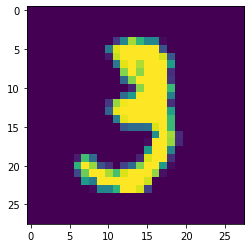

In [ ]:
plt.imshow(x_train[10])
print(y_train[10])

In [ ]:
class MNIST_DNN(nn.Module):
    
    def __init__(self):
        super(MNIST_DNN,self).__init__()
        self.h1 = nn.Linear(in_features=28*28, out_features=128)  # Flattened Data
        self.bn1 = nn.BatchNorm1d(num_features=28*28)
        self.drop1 = nn.Dropout(p=0.3)

        self.h2 = nn.Linear(in_features=128, out_features=256)
        self.bn2 = nn.BatchNorm1d(num_features=128)
        self.drop2 = nn.Dropout(p=0.3)

        self.h3 = nn.Linear(in_features=256, out_features=10)
        # self.bn3 = nn.BatchNorm1d(num_features=256)
        # self.drop3 = nn.Dropout(p=0.3)

    def forward(self, x):
        x = self.bn1(x)
        x = self.h1(x)
        x = F.relu(x)
        x = self.drop1(x)

        x = self.bn2(x)
        x = self.h2(x)
        x = F.relu(x)
        x = self.drop2(x)

        # x = self.bn3(x)
        x = self.h3(x)
        return x

In [ ]:
net = MNIST_DNN()

In [ ]:
list(net.parameters())

[Parameter containing:
 tensor([[-0.0211, -0.0069, -0.0303,  ...,  0.0040, -0.0253,  0.0057],
         [ 0.0157,  0.0210,  0.0184,  ...,  0.0184,  0.0315, -0.0171],
         [-0.0318, -0.0115, -0.0259,  ...,  0.0305,  0.0299, -0.0158],
         ...,
         [ 0.0247, -0.0084, -0.0070,  ..., -0.0151,  0.0088, -0.0065],
         [ 0.0041, -0.0180,  0.0060,  ..., -0.0248,  0.0195, -0.0251],
         [ 0.0355, -0.0185,  0.0121,  ...,  0.0174, -0.0111,  0.0273]],
        requires_grad=True), Parameter containing:
 tensor([-0.0243, -0.0291, -0.0286, -0.0282, -0.0140,  0.0181,  0.0121, -0.0004,
          0.0245, -0.0241,  0.0357,  0.0118,  0.0306, -0.0212, -0.0349, -0.0206,
          0.0043, -0.0116, -0.0051,  0.0329,  0.0042,  0.0055, -0.0050, -0.0192,
          0.0298,  0.0078,  0.0293,  0.0226, -0.0049, -0.0193,  0.0059,  0.0075,
         -0.0230,  0.0295,  0.0078,  0.0057, -0.0029,  0.0170,  0.0174,  0.0105,
         -0.0062, -0.0027, -0.0226,  0.0316,  0.0012,  0.0315, -0.0188,  0.0119,

In [ ]:
device = torch.device('cuda')
net = net.to(device)
opt = Adam(net.parameters(), lr=0.001)

In [ ]:
x_test = x_test.reshape(-1,28*28).to(device)
y_test = y_test.to(device)

In [ ]:
# for batch, target in training_data_loader:
#         batch = batch.float().to(device)
#         target = target.to(device)
        # opt.zero_grad()

        # output = net(batch)
        # print(batch)
        # print(target)
        # print(output)
        # break

tensor([[ 0.2272,  0.2746,  0.4382,  ...,  0.0448,  0.0340,  0.0495],
        [ 0.3772,  0.1707,  0.4520,  ...,  0.2537, -0.3299, -0.2152],
        [ 0.0623,  0.2558,  0.4225,  ..., -0.0916,  0.1570,  0.3553],
        ...,
        [ 0.1137,  0.0667,  0.2855,  ...,  0.3140,  0.0103, -0.0457],
        [ 0.0851,  0.0724,  0.1348,  ...,  0.0056,  0.1693,  0.1420],
        [ 0.2802,  0.2964, -0.0849,  ...,  0.0127,  0.0784,  0.1483]],
       device='cuda:0', grad_fn=<AddmmBackward>)


In [ ]:
n_epochs = 50
for epoch in range(n_epochs):
    training_loss = 0.0
    for batch, target in training_data_loader:
        batch = batch.float().to(device)
        target = target.to(device)

        opt.zero_grad()

        output = net(batch)
        loss = F.cross_entropy(output, target)

        loss.backward()

        training_loss += loss.item()

        opt.step()

    if (epoch+1)%5 == 0:
        output_test = net(x_test.float())
        loss_test = F.cross_entropy(output_test, y_test)
        print("Training Loss: ",training_loss, end='  |  ')
        print("Test Loss: ",loss_test.item()) 

Training Loss:  12.264382302761078  |  Test Loss:  0.1460604965686798
Training Loss:  7.727588031440973  |  Test Loss:  0.14055079221725464
Training Loss:  6.275030996650457  |  Test Loss:  0.14371556043624878
Training Loss:  5.0983318220824  |  Test Loss:  0.1389743685722351
Training Loss:  4.396986724808812  |  Test Loss:  0.15627850592136383
Training Loss:  4.062174935825169  |  Test Loss:  0.16713300347328186
Training Loss:  3.9809568310156465  |  Test Loss:  0.16541947424411774
Training Loss:  3.429025746881962  |  Test Loss:  0.16362807154655457
Training Loss:  3.1077811839058995  |  Test Loss:  0.1693960726261139
Training Loss:  2.9941532546654344  |  Test Loss:  0.16927705705165863


In [ ]:
output_test_prob = F.softmax(output_test, dim=1)
output_test_prob_cpu = output_test_prob.detach().cpu().numpy()

In [ ]:
confusion_matrix(np.argmax(output_test_prob_cpu, axis=1),
                 y_test.detach().cpu().numpy())

array([[ 963,    0,    5,    0,    2,    4,    4,    2,    8,    1],
       [   1, 1123,    3,    0,    0,    1,    4,    4,    1,    3],
       [   2,    1,  994,    6,    6,    0,    1,    9,    3,    4],
       [   3,    1,    8,  981,    0,   11,    1,    6,    5,    2],
       [   0,    0,    3,    0,  953,    2,    5,    8,    7,   16],
       [   2,    1,    3,    9,    0,  856,    9,    2,   10,   11],
       [   3,    2,    3,    0,    5,    7,  931,    0,    3,    0],
       [   3,    2,   10,    6,    4,    1,    0,  990,    6,    6],
       [   1,    5,    3,    4,    1,    6,    3,    0,  922,    4],
       [   2,    0,    0,    4,   11,    4,    0,    7,    9,  962]])

In [ ]:
accuracy_score(np.argmax(output_test_prob_cpu, axis=1),
                 y_test.detach().cpu().numpy())

0.9675

# 23 sep 2021

In [ ]:
!wget https://raw.githubusercontent.com/MorvanZhou/PyTorch-Tutorial/master/tutorial-contents-notebooks/mnist/processed/training.pt
!wget https://raw.githubusercontent.com/MorvanZhou/PyTorch-Tutorial/master/tutorial-contents-notebooks/mnist/processed/test.pt

--2021-09-23 03:36:24--  https://raw.githubusercontent.com/MorvanZhou/PyTorch-Tutorial/master/tutorial-contents-notebooks/mnist/processed/training.pt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47520431 (45M) [application/octet-stream]
Saving to: ‘training.pt’

training.pt         100%[===================>]  45.32M   128MB/s    in 0.4s    

2021-09-23 03:36:25 (128 MB/s) - ‘training.pt’ saved [47520431/47520431]

--2021-09-23 03:36:25--  https://raw.githubusercontent.com/MorvanZhou/PyTorch-Tutorial/master/tutorial-contents-notebooks/mnist/processed/test.pt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import Adam
import gc
import numpy as np


In [ ]:
device = torch.device('cuda')

In [ ]:
x_train, y_train = torch.load('training.pt')
x_test, y_test = torch.load('test.pt')

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

(torch.Size([60000, 28, 28]),
 torch.Size([10000, 28, 28]),
 torch.Size([60000]),
 torch.Size([10000]))

In [ ]:
# If channel is not given then we habe to mention channel as 1
# If RGB then channel equal to 3

x_train, x_test = x_train.reshape(-1,1,28,28), x_test.reshape(-1,1,28,28)

In [ ]:
x_train.shape,x_test.shape

(torch.Size([60000, 1, 28, 28]), torch.Size([10000, 1, 28, 28]))

In [ ]:
train_td = TensorDataset(x_train,y_train)
test_td = TensorDataset(x_test, y_test)

In [ ]:
train_loader = DataLoader(train_td, batch_size=512,shuffle=True)
test_loader = DataLoader(test_td,batch_size=512,shuffle=True)

$$\frac{W_{in} -F + 2P}{S} + 1 $$

In [ ]:
class MNIST_CNN(nn.Module):

    def __init__(self):
        super(MNIST_CNN,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, 
                               padding=1,stride=1)
        
        self.bn1 = nn.BatchNorm2d(num_features=16)
        self.dropout = nn.Dropout2d(p=0.4)
        self.conv2 = nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3,
                               padding=1)
        
        self.bn2 = nn.BatchNorm2d(num_features=32)
        self.conv3 = nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,
                               padding=1)
        
        self.bn3 = nn.BatchNorm2d(num_features=64)
        self.conv4 = nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,
                               padding=1)
        
        self.pool = nn.MaxPool2d(kernel_size=2,stride=2)

        self.fc1 = nn.Linear(in_features=1*1*128, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        # print('1st: ',x.size())

        x = self.bn1(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        # print('2nd: ',x.size())

        x = self.bn2(x)
        x = self.conv3(x)
        x = F.relu(x)
        x = self.pool(x)
        # print('3rd: ',x.size())

        x = self.bn3(x)
        x = self.conv4(x)
        x = F.relu(x)
        x = self.pool(x)
        # print('4th: ',x.size())

        x = x.view(x.size()[0],-1)  # Similar to numpy flatten, Important to flatten the data for dense layer
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)

        return x


In [ ]:
net = MNIST_CNN()

In [ ]:
net(x_train[:2].float())

tensor([[-0.1131,  0.0569, -0.1018, -0.1187, -0.0611, -0.0909,  0.0151, -0.2625,
         -0.0214, -0.0887],
        [-0.0702,  0.3296, -0.1698, -0.0246, -0.1029, -0.0385,  0.1409,  0.3390,
         -0.0821, -0.0874]], grad_fn=<AddmmBackward>)

In [ ]:
net = net.to(device)
opt = Adam(net.parameters())

n_epochs = 5
for epoch in range(n_epochs):
    training_loss = 0.0
    for batch, target in train_loader:
        batch = batch.float().to(device)
        target  = target.to(device)

        opt.zero_grad()

        output = net(batch)
        loss = F.cross_entropy(output, target.long())

        loss.backward()

        training_loss += loss.item()

        opt.step()

    val_output = net(x_test.float().to(device))
    val_loss = F.cross_entropy(val_output, y_test.long().to(device))

    print('epoch: ', epoch)
    print('Training loss: ',training_loss, '    |    ', 'Validation loss: ', val_loss)

epoch:  0
Training loss:  40.75375075265765     |     Validation loss:  tensor(0.0597, device='cuda:0', grad_fn=<NllLossBackward>)
epoch:  1
Training loss:  5.9533092845231295     |     Validation loss:  tensor(0.0397, device='cuda:0', grad_fn=<NllLossBackward>)
epoch:  2
Training loss:  3.9388095531612635     |     Validation loss:  tensor(0.0335, device='cuda:0', grad_fn=<NllLossBackward>)
epoch:  3
Training loss:  3.002587042748928     |     Validation loss:  tensor(0.0325, device='cuda:0', grad_fn=<NllLossBackward>)
epoch:  4
Training loss:  2.3163253008387983     |     Validation loss:  tensor(0.0324, device='cuda:0', grad_fn=<NllLossBackward>)


In [ ]:
gc.collect()
gc.collect()
gc.collect()
gc.collect()

0

In [ ]:
output_1 = net(x_test[:2].float().to(device))

In [ ]:
np.argmax(torch.softmax(output_1,dim=1).detach().cpu().numpy(), axis=1)

array([7, 2])

In [ ]:
y_test[:2]

tensor([7, 2])

# 28 Sep 2021

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c dogs-vs-cats

 98% 534M/543M [00:03<00:00, 141MB/s]
100% 543M/543M [00:03<00:00, 153MB/s]
 98% 267M/271M [00:01<00:00, 162MB/s]
100% 271M/271M [00:01<00:00, 162MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 75.5MB/s]


In [ ]:
! unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [ ]:
! unzip test1.zip

Streaming output truncated to the last 5000 lines.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

In [ ]:
train_data_path = '/content/train'

In [ ]:
import PIL

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else cpu)

In [ ]:
transformers = transforms.Compose([transforms.Resize([128,128]),
                                   transforms.ToTensor(),
                                   ])

In [ ]:
train_dataset = datasets.ImageFolder(train_data_path, transform=transformers)

FileNotFoundError: ignored

# REGRESSION SELF PRACTICE

## MODULE IMPORTS

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import RMSprop, Adam
from torch.utils.data import TensorDataset, DataLoader
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

## DATA PREP

In [ ]:
X , y = make_regression(n_features=8, n_informative=6, n_samples=100000,random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X , y ,test_size=0.2, random_state=12)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
s = StandardScaler().fit(X_train)
X_train = s.transform(X_train)
X_test = s.transform(X_test)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

training_dataset = DataLoader(TensorDataset(torch.from_numpy(X_train),torch.from_numpy(y_train)), batch_size=128, shuffle=True)
testing_dataset = DataLoader(TensorDataset(torch.from_numpy(X_test),torch.from_numpy(y_test)), batch_size=128, shuffle=False)

(80000, 8) (20000, 8) (80000,) (20000,)
(80000, 8) (20000, 8) (80000,) (20000,)


## MODEL DEFINATION

In [ ]:
class regDNN(nn.Module):

    def __init__(self):

        super(regDNN, self).__init__()

        self.bn1 = nn.BatchNorm1d(num_features=8)
        self.inp = nn.Linear(in_features=8, out_features=16)

        self.bn2 = nn.BatchNorm1d(num_features=16)
        self.h1 = nn.Linear(in_features=16, out_features=32)

        self.bn3 = nn.BatchNorm1d(num_features=32)
        self.h2 = nn.Linear(in_features=32, out_features=10)

        self.bn4 = nn.BatchNorm1d(num_features=10)
        self.h3 = nn.Linear(in_features=10, out_features=1)

        self.drop = nn.Dropout(p=0.1)


    def forward(self, x):

        x = self.bn1(x)
        x = self.inp(x)
        x = F.relu(x)
        # x = self.drop(x)

        x = self.bn2(x)
        x = self.h1(x)
        x = F.relu(x)
        # x = self.drop(x)

        x = self.bn3(x)
        x = self.h2(x)
        x = F.relu(x)
        # x = self.drop(x)

        # x = self.bn4(x)
        x = self.h3(x)

        return x 


    def train(self, lr, epochs, model,device):

        opt=Adam(params = model.parameters(), lr=lr)
        
        for epoch in range(epochs):

            training_loss = 0.0
            testing_loss = 0.0
            training_rmse = 0.0
            testing_rmse = 0.0

            for batch, target in training_dataset:

                batch = batch.float().to(device)
                target = target.float().to(device).view(-1,1)

                opt.zero_grad()

                y_hat = model(batch)

                loss = F.mse_loss(y_hat, target.float())

                training_loss += loss.item()
                training_rmse = np.sqrt(training_loss)

                loss.backward()
                opt.step()
                 

            yp = model(torch.from_numpy(X_test).float().to(device))
            testing_loss = F.mse_loss(yp, torch.from_numpy(y_test).float().to(device).view(-1,1))
            testing_rmse = np.sqrt(testing_loss.detach().cpu())

            print(f" Epoch: {epoch} Training loss: {training_loss} Testing loss: {testing_loss}")
            print(f"Training RMSE: {training_rmse} Testing RMSE: {testing_rmse}")

    def predict(self,arr,model,device):
        return model(torch.from_numpy(arr).float().to(device))

## TRAIN AND TEST

In [ ]:
device = 'cuda'
model = regDNN()
model = model.to(device)

model.train(lr = 1e-4, epochs=27, model=model,device=device)

 Epoch: 0 Training loss: 18684504.66015625 Testing loss: 29327.46484375
Training RMSE: 4322.557652612195 Testing RMSE: 171.2526397705078
 Epoch: 1 Training loss: 17450648.474609375 Testing loss: 26365.05078125
Training RMSE: 4177.397332623434 Testing RMSE: 162.37318420410156
 Epoch: 2 Training loss: 15236086.600585938 Testing loss: 22225.1171875
Training RMSE: 3903.3430031943053 Testing RMSE: 149.08090209960938
 Epoch: 3 Training loss: 12437276.302734375 Testing loss: 17396.59765625
Training RMSE: 3526.6522798164233 Testing RMSE: 131.8961639404297
 Epoch: 4 Training loss: 9435497.042480469 Testing loss: 12599.845703125
Training RMSE: 3071.7254178198395 Testing RMSE: 112.24903106689453
 Epoch: 5 Training loss: 6636145.084472656 Testing loss: 8362.236328125
Training RMSE: 2576.0716380707768 Testing RMSE: 91.44526672363281
 Epoch: 6 Training loss: 4284844.879150391 Testing loss: 4943.21142578125
Training RMSE: 2069.9866857423 Testing RMSE: 70.30797576904297
 Epoch: 7 Training loss: 246860

In [ ]:
y_pred = model.predict(arr=X_test,model=model,device=device).detach().cpu().reshape(1,-1)
y_pred

tensor([[  43.9224,   66.7214,  166.1382,  ...,  306.9371,  151.6488,
         -153.6604]])

In [ ]:
np.sqrt(mean_squared_error(y_pred=y_pred[0], y_true=y_test))

3.4999905825025994

# 7 Oct 2021

Auto Encoder:
 
Pending Task -->Correct loss

In [ ]:
!wget https://github.com/MorvanZhou/PyTorch-Tutorial/raw/master/tutorial-contents-notebooks/mnist/processed/training.pt

--2021-10-07 07:38:20--  https://github.com/MorvanZhou/PyTorch-Tutorial/raw/master/tutorial-contents-notebooks/mnist/processed/training.pt
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MorvanZhou/PyTorch-Tutorial/master/tutorial-contents-notebooks/mnist/processed/training.pt [following]
--2021-10-07 07:38:20--  https://raw.githubusercontent.com/MorvanZhou/PyTorch-Tutorial/master/tutorial-contents-notebooks/mnist/processed/training.pt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47520431 (45M) [application/octet-stream]
Saving to: ‘training.pt’

training.pt         100%[===================>]

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

In [ ]:
x_train, y_train = torch.load('training.pt')

In [ ]:
x_train[:2]

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8)

In [ ]:
x_train.shape

torch.Size([60000, 28, 28])

In [ ]:
x_train = x_train.reshape(-1,28*28)

In [ ]:
print(x_train.shape)
x_train[:2]

torch.Size([60000, 784])


tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8)

In [ ]:
device = torch.device('cuda')

In [ ]:
# torch.cuda.manual_seed_all(125)

In [ ]:
train_tensor_data = TensorDataset(x_train.float(),x_train.float())

In [ ]:
train_tensor_data[:2]

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]))

In [ ]:
train_dl = DataLoader(train_tensor_data, batch_size=128,shuffle=True)

In [ ]:
class autoencode(nn.Module):
    
    def __init__(self):
        super(autoencode, self).__init__()
        self.en_fc1 = nn.Linear(in_features=28*28, out_features=128)
        self.en_fc2 = nn.Linear(in_features=128,out_features=25)
        self.de_fc1 = nn.Linear(in_features=25, out_features=128)
        self.de_fc2 = nn.Linear(in_features=128, out_features=28*28)
    
    def encoder(self,x):
        x = self.en_fc1(x)
        x = F.relu(x)
        x= self.en_fc2(x)
        x = F.relu(x)

        return x

    def decoder(self,x):
        x = self.de_fc1(x)
        x = F.relu(x)
        x = self.de_fc2(x)
        x = F.relu(x)
        return x

    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

AE = autoencode()

In [ ]:
AE = AE.to(device)

In [ ]:
opt = Adam(AE.parameters(), lr=0.0001)

In [ ]:
def train_AE(train_loader,model, opt):

    model.train()
    training_loss = 0.0
    for batch, target  in train_loader:
        batch = batch.to(device)
        target = target.to(device)

        opt.zero_grad()

        out = model(batch)
        loss = F.mse_loss(out/255, target/255)
        loss.backward()



        training_loss = training_loss + loss.item()
        # print(training_loss)

        opt.step()
    return  training_loss

In [ ]:
epochs = 2000
training_loss = []
for epoch in tqdm(range(epochs)):
    training_loss.append(train_AE(train_loader=train_dl, model = AE, opt=opt))
    if (epoch+1) in [5,10,15,20,25,50,55,75,105,250,300,400,550,600,750,800,850,900,950,1000,1100,1200,1300,1500,1700,1800,1950,2000]:
        print('training_loss: ',training_loss[epoch])

  0%|          | 5/2000 [00:09<1:01:52,  1.86s/it]

training_loss:  13.433629425242543


  0%|          | 10/2000 [00:18<1:01:31,  1.85s/it]

training_loss:  11.802166962996125


  1%|          | 15/2000 [00:28<1:02:16,  1.88s/it]

training_loss:  11.36549935117364


  1%|          | 20/2000 [00:37<1:01:39,  1.87s/it]

training_loss:  11.119651833549142


  1%|▏         | 25/2000 [00:46<1:01:43,  1.87s/it]

training_loss:  10.954708060249686


  2%|▎         | 50/2000 [01:33<59:28,  1.83s/it]

training_loss:  9.85914308950305


  3%|▎         | 55/2000 [01:42<1:00:06,  1.85s/it]

training_loss:  9.788041897118092


  4%|▍         | 75/2000 [02:19<58:57,  1.84s/it]

training_loss:  9.628503486514091


  5%|▌         | 105/2000 [03:15<58:34,  1.85s/it]

training_loss:  9.487064871937037


 12%|█▎        | 250/2000 [07:42<53:47,  1.84s/it]

training_loss:  8.923023167997599


 15%|█▌        | 300/2000 [09:15<52:09,  1.84s/it]

training_loss:  8.748619606718421


 20%|██        | 400/2000 [12:20<49:16,  1.85s/it]

training_loss:  8.67188100144267


 22%|██▏       | 431/2000 [13:17<48:24,  1.85s/it]


KeyboardInterrupt: ignored

In [ ]:
# training_loss

In [ ]:
import matplotlib.pyplot as plt


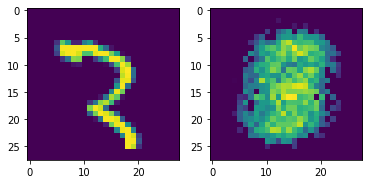

In [ ]:
index = 500
plt.figure(figsize=(6,14))
plt.subplot(121)
plt.imshow(x_train[index].reshape(28,28))
plt.subplot(122)
plt.imshow(AE(x_train[index].float().to(device)).detach().cpu().numpy().reshape(28,28))

In [ ]:
AE.encoder(x_train[index].float().to(device))

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2475,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
       device='cuda:0', grad_fn=<ReluBackward0>)

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
data_reduced = AE.encoder(x_train.float().to(device))

In [ ]:
tsne = TSNE()

In [ ]:
tsne_mat = tsne.fit_transform(data_reduced.detach().cpu().numpy()[:1000,:])

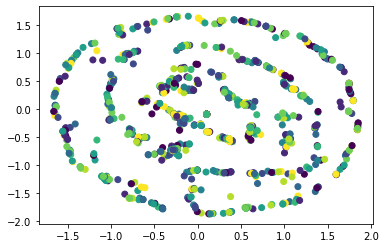

In [ ]:
plt.scatter(tsne_mat[:,0], tsne_mat[:,1],c=y_train.numpy()[:1000])

# 18 oct 2021

In [ ]:
!wget https://github.com/MorvanZhou/PyTorch-Tutorial/raw/master/tutorial-contents-notebooks/mnist/processed/training.pt

--2021-10-18 05:50:40--  https://github.com/MorvanZhou/PyTorch-Tutorial/raw/master/tutorial-contents-notebooks/mnist/processed/training.pt
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MorvanZhou/PyTorch-Tutorial/master/tutorial-contents-notebooks/mnist/processed/training.pt [following]
--2021-10-18 05:50:40--  https://raw.githubusercontent.com/MorvanZhou/PyTorch-Tutorial/master/tutorial-contents-notebooks/mnist/processed/training.pt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47520431 (45M) [application/octet-stream]
Saving to: ‘training.pt’

training.pt         100%[===================>]

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm, tqdm_gui
import matplotlib.pyplot as plt

In [ ]:
x_train, y_train = torch.load('training.pt')

In [ ]:
x_train[:2]

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8)

In [ ]:
def salt_n_pepper_noise(x):
    return x + torch.rand(x.size())

def gaussian_noise(x):
    return x + torch.normal(0,0.15,size=x.size())

def normalize(x):
    return (x-x.min())/(x.max()-x.min())

In [ ]:
x_train_norm = normalize(x_train)

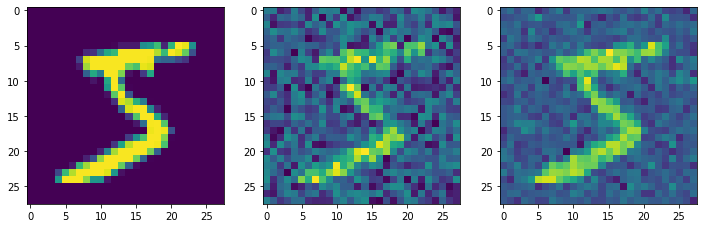

In [ ]:
idx = 0
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(x_train_norm[idx])
plt.subplot(1,3,2)
plt.imshow(salt_n_pepper_noise(x_train_norm[idx]))
plt.subplot(1,3,3)
plt.imshow(gaussian_noise(x_train_norm[idx]))


In [ ]:
class AE_CNN(nn.Module):

    def __init__(self):

        super(AE_CNN,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=32,kernel_size=3,padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.convt1 = nn.ConvTranspose2d(in_channels=64, out_channels=32, 
                                         kernel_size=2,padding=0,stride=2)
        self.convt2 = nn.ConvTranspose2d(in_channels=32, out_channels=1, 
                                         kernel_size=2, padding=0,stride=2)

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    

    def encoder(self,x):

        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        # print(x.size())

        return x


    def decoder(self, x):

        x = self.convt1(x)
        x = F.relu(x)
        x = self.convt2(x)
        x = F.relu(x)

        return x

    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)

        return x

In [ ]:
ae_cnn_model = AE_CNN()

In [ ]:
sample_img = x_train_norm[0]
sample_img = sample_img.reshape(-1,1,28,28)
# ae_cnn_model(sample_img)

In [ ]:
device = torch.device('cuda')

In [ ]:
ae_target = x_train_norm.reshape(-1,1,28,28)
ae_train = salt_n_pepper_noise(x_train_norm).reshape(-1,1,28,28)

In [ ]:
train_loader = DataLoader(TensorDataset(ae_train, ae_target), batch_size=64, shuffle=True)

In [ ]:
opt = Adam(ae_cnn_model.parameters(), lr=0.001)

In [ ]:
ae_cnn__model = ae_cnn_model.to(device)

In [ ]:
max_epochs = 50

for epoch in tqdm(range(max_epochs)):
    training_loss = 0.0

    for batch, target in train_loader:
        batch = batch.to(device)
        target = target.to(device)

        opt.zero_grad()

        output = ae_cnn_model(batch)
        loss = F.mse_loss(output, target)
        loss.backward()

        training_loss += loss.item()
        opt.step()

    if (epoch+1)%5:
        print("Training loss: ",training_loss)

  2%|▏         | 1/50 [00:10<08:23, 10.28s/it]

Training loss:  5.256757381372154


  4%|▍         | 2/50 [00:20<08:09, 10.19s/it]

Training loss:  5.168496503029019


  6%|▌         | 3/50 [00:30<07:56, 10.14s/it]

Training loss:  5.122123474255204


  8%|▊         | 4/50 [00:40<07:49, 10.20s/it]

Training loss:  5.08604535786435


 12%|█▏        | 6/50 [01:01<07:28, 10.18s/it]

Training loss:  5.0285564051009715


 14%|█▍        | 7/50 [01:11<07:16, 10.16s/it]

Training loss:  5.001375315710902


 16%|█▌        | 8/50 [01:21<07:06, 10.16s/it]

Training loss:  4.977161925286055


 18%|█▊        | 9/50 [01:31<06:56, 10.17s/it]

Training loss:  4.951554713770747


 22%|██▏       | 11/50 [01:51<06:37, 10.18s/it]

Training loss:  4.906559974886477


 24%|██▍       | 12/50 [02:02<06:26, 10.18s/it]

Training loss:  4.888233492616564


 26%|██▌       | 13/50 [02:12<06:16, 10.19s/it]

Training loss:  4.869766633491963


 28%|██▊       | 14/50 [02:22<06:05, 10.17s/it]

Training loss:  4.8496581902727485


 32%|███▏      | 16/50 [02:42<05:45, 10.17s/it]

Training loss:  4.819970962591469


 34%|███▍      | 17/50 [02:53<05:35, 10.18s/it]

Training loss:  4.8123848382383585


 36%|███▌      | 18/50 [03:03<05:26, 10.19s/it]

Training loss:  4.802255162969232


 38%|███▊      | 19/50 [03:13<05:16, 10.20s/it]

Training loss:  4.7871642000973225


 42%|████▏     | 21/50 [03:33<04:54, 10.16s/it]

Training loss:  4.772937060333788


 44%|████▍     | 22/50 [03:43<04:45, 10.19s/it]

Training loss:  4.763167459052056


 46%|████▌     | 23/50 [03:54<04:34, 10.16s/it]

Training loss:  4.758106607478112


 48%|████▊     | 24/50 [04:04<04:24, 10.17s/it]

Training loss:  4.749469602946192


 52%|█████▏    | 26/50 [04:24<04:03, 10.17s/it]

Training loss:  4.735795425251126


 54%|█████▍    | 27/50 [04:34<03:53, 10.16s/it]

Training loss:  4.729497722350061


 56%|█████▌    | 28/50 [04:45<03:44, 10.19s/it]

Training loss:  4.725776589009911


 58%|█████▊    | 29/50 [04:55<03:33, 10.16s/it]

Training loss:  4.721260434016585


 62%|██████▏   | 31/50 [05:15<03:12, 10.15s/it]

Training loss:  4.709725308232009


 64%|██████▍   | 32/50 [05:25<03:02, 10.16s/it]

Training loss:  4.7061926811002195


 66%|██████▌   | 33/50 [05:35<02:52, 10.17s/it]

Training loss:  4.6999471206218


 68%|██████▊   | 34/50 [05:45<02:42, 10.16s/it]

Training loss:  4.695935338269919


 72%|███████▏  | 36/50 [06:06<02:22, 10.16s/it]

Training loss:  4.68711274722591


 74%|███████▍  | 37/50 [06:16<02:12, 10.18s/it]

Training loss:  4.680884395260364


 76%|███████▌  | 38/50 [06:26<02:02, 10.19s/it]

Training loss:  4.677810133434832


 78%|███████▊  | 39/50 [06:36<01:52, 10.19s/it]

Training loss:  4.6746621280908585


 82%|████████▏ | 41/50 [06:57<01:31, 10.15s/it]

Training loss:  4.664320141542703


 84%|████████▍ | 42/50 [07:07<01:21, 10.16s/it]

Training loss:  4.658600837457925


 86%|████████▌ | 43/50 [07:17<01:10, 10.13s/it]

Training loss:  4.6571018267422915


 88%|████████▊ | 44/50 [07:27<01:00, 10.14s/it]

Training loss:  4.654165774118155


 92%|█████████▏| 46/50 [07:47<00:40, 10.13s/it]

Training loss:  4.641624292824417


 94%|█████████▍| 47/50 [07:57<00:30, 10.11s/it]

Training loss:  4.641556169837713


 96%|█████████▌| 48/50 [08:07<00:20, 10.15s/it]

Training loss:  4.636305606458336


 98%|█████████▊| 49/50 [08:18<00:10, 10.15s/it]

Training loss:  4.634248381946236


100%|██████████| 50/50 [08:28<00:00, 10.17s/it]


In [ ]:
sample_img_gpu = ae_train[:2].to(device)

In [ ]:
denoised_img = ae_cnn_model(sample_img_gpu).detach().cpu().numpy()

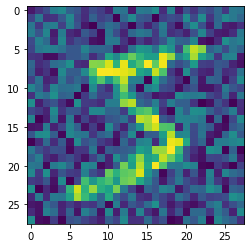

In [ ]:
plt.imshow(ae_train[0][0])

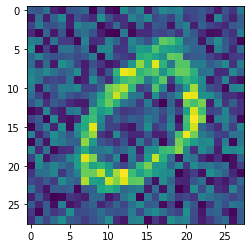

In [ ]:
plt.imshow(ae_train[1][0])

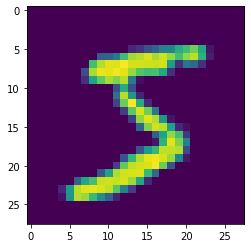

In [ ]:
plt.imshow(denoised_img[0][0])

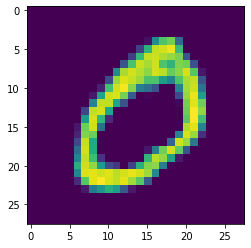

In [ ]:
plt.imshow(denoised_img[1][0])

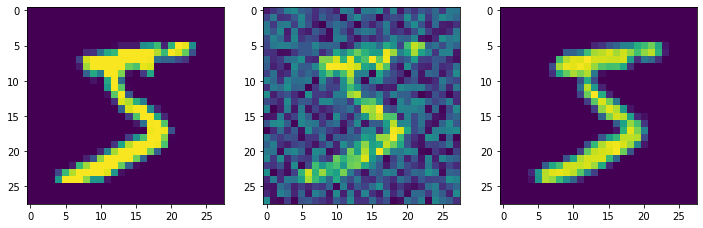

In [ ]:
idx = 0
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.imshow(x_train_norm[idx])

plt.subplot(1,3,2)
plt.imshow(ae_train[idx][0])

plt.subplot(1,3,3)
plt.imshow(denoised_img[idx][0])
plt.show()